<div style="width:100%; overflow:hidden; background-color:#F1F1E6; padding: 10px; border-style: outset; color:#17469e">
    <div style="width: 80%; float: left;">
    <h2 align="center">Universidad de Sonora</h2>
    <hr style="border-width: 3px; border-color:#17469e">
          <h1>Reconocimiento de patrones: Preparación de los datos</h1>
     <h4>Ramón Soto C. <a href="mailto:rsotoc@moviquest.com/">(rsotoc@moviquest.com)</a></h4>
    </div>
    <div style="float: right;">
    <img src="images/escudo_unison.png">
    </div>
</div>

## Limpieza de los datos 

La limpieza de datos es el proceso de identificar y corregir o eliminar imperfecciones en un conjunto de datos. Las actividades típicas en esta fase son rellenar valores faltantes, suavizar ruido, identificar y remover valores atípicos y resolver inconsistencias.

### Valores faltantes 

El problema de valores faltantes es un problema muy frecuente al tratar de realizar cualquier tarea de análisis de datos y puede deberse a diversas razones: 
* Fallas en los mecanismos de medición (sensores defectuosos, por ejemplo) 
* Integración de conjuntos de datos no bien coordinados (mediciones con diferentes ciclos, por ejemplo) 
* Variables nuevas no consideradas o no disponibles originalmente 
* Respuestas omitidas intencionalmente por la fuente 

![](images/missingData.png)
![ ](images/blank.png)

La omisión de valores en el conjunto de datos puede tener diversos efectos y diferentes grados de impacto. En términos generales, se suelen considerar los siguientes grados de impacto, dependiendo del porcentaje de valores faltantes (*dumb rules*):
* Menos de 1%: Trivial (no relevante)
* 1-5%: Manejable
* 5-15%: Manejable mediante métodos sofisticados
* Más de 15%: Crítico, con impacto severo en cualquier tipo de interpretación

Considérese el siguiente conjunto de datos tomados del conjunto de datos de diabetes:

In [1]:
"""
Reconocimiento de patrones: Limpieza de datos
"""

import numpy as np
import pandas as pd

path = 'Data sets/Pima Indian Data Set/'

In [2]:
df = pd.read_csv(path + "pima-indians-diabetes.data-small", 
                 names = ['emb', 'gl2h', 'pad', 'ept', 'is2h', 'imc', 'fpd', 'edad', 'class'])

print(df.describe(), '\n')
print(df)

            emb        gl2h        pad        ept        is2h        imc  \
count  20.00000   20.000000  18.000000  11.000000    9.000000  19.000000   
mean    4.50000  129.400000  68.555556  32.363636  258.111111  32.578947   
std     3.56149   35.354446  16.346333   8.891262  263.487877   6.509103   
min     0.00000   78.000000  30.000000  19.000000   83.000000  23.300000   
25%     1.00000  106.000000  64.500000  26.000000   94.000000  27.600000   
50%     4.50000  117.000000  71.000000  32.000000  168.000000  30.500000   
75%     7.25000  152.500000  74.000000  36.500000  230.000000  36.450000   
max    10.00000  197.000000  96.000000  47.000000  846.000000  45.800000   

             fpd       edad     class  
count  20.000000  20.000000  20.00000  
mean    0.511650  37.450000   0.65000  
std     0.513691  11.591626   0.48936  
min     0.134000  21.000000   0.00000  
25%     0.198500  30.750000   0.00000  
50%     0.374500  32.000000   1.00000  
75%     0.560000  50.250000   1.000

Como puede observarse, la variable *count* no es la misma para todas las columnas. Comparando con el despliegue de los datos, las diferencias en el valor de esta variable corresponden a los valores faltantes. Una mayor exploración podemos obtenerla de la siguiente manera:

In [3]:
print ('Tabla de valores nulos')
print (df.isnull(), '\n')

print ('Contabilidad de valores nulos por columna')
print (df.isnull().sum(), '\n')

print ('Porcentaje de datos nulos en la columna *ept*')
eptNullPje = df['ept'].isnull().sum() / df.shape[0] * 100
print (eptNullPje)

Tabla de valores nulos
      emb   gl2h    pad    ept   is2h    imc    fpd   edad  class
0   False  False  False  False   True  False  False  False  False
1   False  False  False  False   True  False  False  False  False
2   False  False  False   True   True  False  False  False  False
3   False  False  False  False  False  False  False  False  False
4   False  False  False  False  False  False  False  False  False
5   False  False  False   True   True  False  False  False  False
6   False  False  False  False  False  False  False  False  False
7   False  False   True   True   True  False  False  False  False
8   False  False  False  False  False  False  False  False  False
9   False  False  False   True   True   True  False  False  False
10  False  False  False   True   True  False  False  False  False
11  False  False  False   True   True  False  False  False  False
12  False  False  False   True   True  False  False  False  False
13  False  False  False  False  False  False  False  

El porcentaje de valores faltantes en este segmento de datos (45% de valores faltantes) está muy por encima de lo que puede tratarse de manera directa, según las reglas anteriores. 

### Identificación de valores faltantes 

En muchos casos, incluso detectar los valores faltantes es un problema. En nuestros datos originales, lo valores faltantes vienen enmascarados como 0, no como un espacio vacío. En este caso, el procedimiento anterior fallaría pues no existen datos 'no disponibles'. Debemos primero analizar los datos y detectar cómo se manifiestan los valores faltantes. En nuestro ejemplo, asumimos que *ept*, esto es, el 'Espesor de la piel del tríceps' no puede tener un valor de 0 y, por lo tanto, ese valor representa un valor faltante. 

In [4]:
df2 = pd.read_csv(path + "pima-indians-diabetes.data-small-orig", 
                 names = ['emb', 'gl2h', 'pad', 'ept', 'is2h', 'imc', 'fpd', 'edad', 'class'])
print(df2, '\n')

    emb  gl2h  pad  ept  is2h   imc    fpd  edad  class
0     6   148   72   35     0  33.6  0.627    50      1
1     1    85   66   29     0  26.6  0.351    31      0
2     8   183   64    0     0  23.3  0.672    32      1
3     1    89   66   23    94  28.1  0.167    21      0
4     0   137   40   35   168  43.1  2.288    33      1
5     5   116   74    0     0  25.6  0.201    30      0
6     3    78   50   32    88  31.0  0.248    26      1
7    10   115    0    0     0  35.3  0.134    29      0
8     2   197   70   45   543  30.5  0.158    53      1
9     8   125   96    0     0   0.0  0.232    54      1
10    4   110   92    0     0  37.6  0.191    30      0
11   10   168   74    0     0  38.0  0.537    34      1
12   10   139   80    0     0  27.1  1.441    57      0
13    1   189   60   23   846  30.1  0.398    59      1
14    5   166   72   19   175  25.8  0.587    51      1
15    7   100    0    0     0  30.0  0.484    32      1
16    0   118   84   47   230  45.8  0.551    31

Para resolver el problema, debemos preparar los datos asignando una etiqueta *NaN* a los valores que consideramos como valores 'faltantes': 

In [5]:
df2.loc[df2['ept'] == 0,'ept'] = np.nan
print(df2)

    emb  gl2h  pad   ept  is2h   imc    fpd  edad  class
0     6   148   72  35.0     0  33.6  0.627    50      1
1     1    85   66  29.0     0  26.6  0.351    31      0
2     8   183   64   NaN     0  23.3  0.672    32      1
3     1    89   66  23.0    94  28.1  0.167    21      0
4     0   137   40  35.0   168  43.1  2.288    33      1
5     5   116   74   NaN     0  25.6  0.201    30      0
6     3    78   50  32.0    88  31.0  0.248    26      1
7    10   115    0   NaN     0  35.3  0.134    29      0
8     2   197   70  45.0   543  30.5  0.158    53      1
9     8   125   96   NaN     0   0.0  0.232    54      1
10    4   110   92   NaN     0  37.6  0.191    30      0
11   10   168   74   NaN     0  38.0  0.537    34      1
12   10   139   80   NaN     0  27.1  1.441    57      0
13    1   189   60  23.0   846  30.1  0.398    59      1
14    5   166   72  19.0   175  25.8  0.587    51      1
15    7   100    0   NaN     0  30.0  0.484    32      1
16    0   118   84  47.0   230 

En plataformas para *data science*, como R y Pandas, los valores marcados como 'NaN' suelen ser ignorados en las operaciones: 


In [6]:
print(df2.info(), '\n')

print(df2.describe(), '\n')

print('Suma y promedio de ept: ({}, {})'.format(df2['ept'].sum(), df2['ept'].mean()), '\n')

print('Promedio tomando en cuenta los 0s:', df2['ept'].sum()/20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 9 columns):
emb      20 non-null int64
gl2h     20 non-null int64
pad      20 non-null int64
ept      11 non-null float64
is2h     20 non-null int64
imc      20 non-null float64
fpd      20 non-null float64
edad     20 non-null int64
class    20 non-null int64
dtypes: float64(3), int64(6)
memory usage: 1.5 KB
None 

            emb        gl2h        pad        ept        is2h        imc  \
count  20.00000   20.000000  20.000000  11.000000   20.000000  20.000000   
mean    4.50000  129.400000  61.700000  32.363636  116.150000  30.950000   
std     3.56149   35.354446  26.159631   8.891262  215.843821   9.654424   
min     0.00000   78.000000   0.000000  19.000000    0.000000   0.000000   
25%     1.00000  106.000000  57.500000  26.000000    0.000000  26.975000   
50%     4.50000  117.000000  70.000000  32.000000    0.000000  30.300000   
75%     7.25000  152.500000  74.000000  36.500000  114.00000


### Tratamiento de valores faltantes 

El método más simple para tratar con el problema de valores faltantes es la *eliminación de casos*, también conocido como *análisis de casos completos. Este método está disponible en todos los paquetes de análisis de datos y es la opción por omisión en la mayoría. 

En Pandas podemos eliminar los valores faltantes de diferentes maneras. *DataFrame.dropna*() elimina todos los renglones en el DataFrame en los que hay al menos un valor *NaN*:

In [7]:
print(df, '\n')
print(df.dropna())

    emb  gl2h   pad   ept   is2h   imc    fpd  edad  class
0     6   148  72.0  35.0    NaN  33.6  0.627    50      1
1     1    85  66.0  29.0    NaN  26.6  0.351    31      0
2     8   183  64.0   NaN    NaN  23.3  0.672    32      1
3     1    89  66.0  23.0   94.0  28.1  0.167    21      0
4     0   137  40.0  35.0  168.0  43.1  2.288    33      1
5     5   116  74.0   NaN    NaN  25.6  0.201    30      0
6     3    78  50.0  32.0   88.0  31.0  0.248    26      1
7    10   115   NaN   NaN    NaN  35.3  0.134    29      0
8     2   197  70.0  45.0  543.0  30.5  0.158    53      1
9     8   125  96.0   NaN    NaN   NaN  0.232    54      1
10    4   110  92.0   NaN    NaN  37.6  0.191    30      0
11   10   168  74.0   NaN    NaN  38.0  0.537    34      1
12   10   139  80.0   NaN    NaN  27.1  1.441    57      0
13    1   189  60.0  23.0  846.0  30.1  0.398    59      1
14    5   166  72.0  19.0  175.0  25.8  0.587    51      1
15    7   100   NaN   NaN    NaN  30.0  0.484    32     

El parámetro *tresh* en DataFrame.dropna() permite eliminar todos los renglones que no contengan al menos el número de columnas "limpias" expresado por el parámetro. En los ejemplos a continuación, se conservan 1) sólo los renglones que tienen al menos 8 columnas *limpias* y 2) los renglones que tienen al menos 7 columnas con valores definidos:

In [8]:
print(df.dropna(thresh=8), '\n')
print(df.dropna(thresh=7))

    emb  gl2h   pad   ept   is2h   imc    fpd  edad  class
0     6   148  72.0  35.0    NaN  33.6  0.627    50      1
1     1    85  66.0  29.0    NaN  26.6  0.351    31      0
3     1    89  66.0  23.0   94.0  28.1  0.167    21      0
4     0   137  40.0  35.0  168.0  43.1  2.288    33      1
6     3    78  50.0  32.0   88.0  31.0  0.248    26      1
8     2   197  70.0  45.0  543.0  30.5  0.158    53      1
13    1   189  60.0  23.0  846.0  30.1  0.398    59      1
14    5   166  72.0  19.0  175.0  25.8  0.587    51      1
16    0   118  84.0  47.0  230.0  45.8  0.551    31      1
18    1   103  30.0  38.0   83.0  43.3  0.183    33      0
19    1   115  70.0  30.0   96.0  34.6  0.529    32      1 

    emb  gl2h   pad   ept   is2h   imc    fpd  edad  class
0     6   148  72.0  35.0    NaN  33.6  0.627    50      1
1     1    85  66.0  29.0    NaN  26.6  0.351    31      0
2     8   183  64.0   NaN    NaN  23.3  0.672    32      1
3     1    89  66.0  23.0   94.0  28.1  0.167    21   

### Imputación 

El análisis de casos completos es una opción aceptable si el porcentaje de valores faltantes es pequeño. En la mayoría de los casos, es preferible reemplazar los valores faltantes por valores calculados por omisión o valores calculados. Esta operación se denomina **imputación**. En el siguiente ejemplo, todos los valores *NaN* son reemplazados por 0, lo cual pudiera seguir la lógica de que "si el dato no está disponible es que en realidad era cero.

In [9]:
print(df, "\n")
df3 = df.fillna(0)
print(df3, "\n")
print (df3.describe())

    emb  gl2h   pad   ept   is2h   imc    fpd  edad  class
0     6   148  72.0  35.0    NaN  33.6  0.627    50      1
1     1    85  66.0  29.0    NaN  26.6  0.351    31      0
2     8   183  64.0   NaN    NaN  23.3  0.672    32      1
3     1    89  66.0  23.0   94.0  28.1  0.167    21      0
4     0   137  40.0  35.0  168.0  43.1  2.288    33      1
5     5   116  74.0   NaN    NaN  25.6  0.201    30      0
6     3    78  50.0  32.0   88.0  31.0  0.248    26      1
7    10   115   NaN   NaN    NaN  35.3  0.134    29      0
8     2   197  70.0  45.0  543.0  30.5  0.158    53      1
9     8   125  96.0   NaN    NaN   NaN  0.232    54      1
10    4   110  92.0   NaN    NaN  37.6  0.191    30      0
11   10   168  74.0   NaN    NaN  38.0  0.537    34      1
12   10   139  80.0   NaN    NaN  27.1  1.441    57      0
13    1   189  60.0  23.0  846.0  30.1  0.398    59      1
14    5   166  72.0  19.0  175.0  25.8  0.587    51      1
15    7   100   NaN   NaN    NaN  30.0  0.484    32     

Sin embargo, en muchos casos un valor por omisión de cero no tiene sentido. En nuestro ejemplo con los datos de diabetes, un valor de cero en la columna *pad* (*Presión diastólica de la sangre*) es imposible en una persona viva. En este caso, una mejor opción es rellenar los valores faltantes por el mínimo registrado:

In [10]:
df3 = df.fillna(df.min())
print(df3, "\n")
print (df3.describe())

    emb  gl2h   pad   ept   is2h   imc    fpd  edad  class
0     6   148  72.0  35.0   83.0  33.6  0.627    50      1
1     1    85  66.0  29.0   83.0  26.6  0.351    31      0
2     8   183  64.0  19.0   83.0  23.3  0.672    32      1
3     1    89  66.0  23.0   94.0  28.1  0.167    21      0
4     0   137  40.0  35.0  168.0  43.1  2.288    33      1
5     5   116  74.0  19.0   83.0  25.6  0.201    30      0
6     3    78  50.0  32.0   88.0  31.0  0.248    26      1
7    10   115  30.0  19.0   83.0  35.3  0.134    29      0
8     2   197  70.0  45.0  543.0  30.5  0.158    53      1
9     8   125  96.0  19.0   83.0  23.3  0.232    54      1
10    4   110  92.0  19.0   83.0  37.6  0.191    30      0
11   10   168  74.0  19.0   83.0  38.0  0.537    34      1
12   10   139  80.0  19.0   83.0  27.1  1.441    57      0
13    1   189  60.0  23.0  846.0  30.1  0.398    59      1
14    5   166  72.0  19.0  175.0  25.8  0.587    51      1
15    7   100  30.0  19.0   83.0  30.0  0.484    32     

Otras alternativas comunes son rellenar los valores faltantes con el valor máximo o con valores estadísticos.

Reemplazar los valores faltantes por el valor promedio de esa variable es uno de los métodos más comunes de imputación, sin embargo, la media es una medida vulnerable a valores atípicos. Una alternativa más robusta ante este problema es la mediana. 

In [11]:
print("Rellenando con el valor máximo \n", df.fillna(df.max()).describe(), "\n")
print("Rellenando con la media \n", df.fillna(df.mean()).describe(), "\n")
print("Rellenando con la mediana \n", df.fillna(df.median()).describe(), "\n")
print("Rellenando con la moda \n", df.fillna(df.mode()).describe())

Rellenando con el valor máximo 
             emb        gl2h        pad        ept        is2h        imc  \
count  20.00000   20.000000  20.000000  20.000000   20.000000  20.000000   
mean    4.50000  129.400000  71.300000  38.950000  581.450000  33.240000   
std     3.56149   35.354446  17.619069   9.870077  345.359687   6.991303   
min     0.00000   78.000000  30.000000  19.000000   83.000000  23.300000   
25%     1.00000  106.000000  65.500000  31.500000  173.250000  27.850000   
50%     4.50000  117.000000  72.000000  46.000000  846.000000  30.750000   
75%     7.25000  152.500000  81.000000  47.000000  846.000000  37.700000   
max    10.00000  197.000000  96.000000  47.000000  846.000000  45.800000   

             fpd       edad     class  
count  20.000000  20.000000  20.00000  
mean    0.511650  37.450000   0.65000  
std     0.513691  11.591626   0.48936  
min     0.134000  21.000000   0.00000  
25%     0.198500  30.750000   0.00000  
50%     0.374500  32.000000   1.00000  
75

Otra alternativa común es rellenar los valores faltantes con el valor no nulo previo o el siguiente:

In [12]:
print(df, "\n")
print("Replicar hacia enfrente\n", df.fillna(method='pad'), "\n")
print("Replicar hacia atrás\n", df.fillna(method='bfill'))

    emb  gl2h   pad   ept   is2h   imc    fpd  edad  class
0     6   148  72.0  35.0    NaN  33.6  0.627    50      1
1     1    85  66.0  29.0    NaN  26.6  0.351    31      0
2     8   183  64.0   NaN    NaN  23.3  0.672    32      1
3     1    89  66.0  23.0   94.0  28.1  0.167    21      0
4     0   137  40.0  35.0  168.0  43.1  2.288    33      1
5     5   116  74.0   NaN    NaN  25.6  0.201    30      0
6     3    78  50.0  32.0   88.0  31.0  0.248    26      1
7    10   115   NaN   NaN    NaN  35.3  0.134    29      0
8     2   197  70.0  45.0  543.0  30.5  0.158    53      1
9     8   125  96.0   NaN    NaN   NaN  0.232    54      1
10    4   110  92.0   NaN    NaN  37.6  0.191    30      0
11   10   168  74.0   NaN    NaN  38.0  0.537    34      1
12   10   139  80.0   NaN    NaN  27.1  1.441    57      0
13    1   189  60.0  23.0  846.0  30.1  0.398    59      1
14    5   166  72.0  19.0  175.0  25.8  0.587    51      1
15    7   100   NaN   NaN    NaN  30.0  0.484    32     

Esta forma de tratar el problema de valores faltantes es muy común en análisis de series de tiempo. Esta estrategia suele designarse como *último valor conocido* y equivale a asumir que el sistema no pudo cambiar demasiado desde la última medición. En otros casos debe analizarse si los datos realmente tienen una estructura local; esto es, determinar si tiene sentido esperar que los registros vecinos tengan valores cercanos. en el caso del conjunto de datos de diabetes, esta suposición no es válida.

Podemos también limitar el número de registros que son modificados de esta forma:

In [13]:
print(df.fillna(method='pad', limit=1))

    emb  gl2h   pad   ept   is2h   imc    fpd  edad  class
0     6   148  72.0  35.0    NaN  33.6  0.627    50      1
1     1    85  66.0  29.0    NaN  26.6  0.351    31      0
2     8   183  64.0  29.0    NaN  23.3  0.672    32      1
3     1    89  66.0  23.0   94.0  28.1  0.167    21      0
4     0   137  40.0  35.0  168.0  43.1  2.288    33      1
5     5   116  74.0  35.0  168.0  25.6  0.201    30      0
6     3    78  50.0  32.0   88.0  31.0  0.248    26      1
7    10   115  50.0  32.0   88.0  35.3  0.134    29      0
8     2   197  70.0  45.0  543.0  30.5  0.158    53      1
9     8   125  96.0  45.0  543.0  30.5  0.232    54      1
10    4   110  92.0   NaN    NaN  37.6  0.191    30      0
11   10   168  74.0   NaN    NaN  38.0  0.537    34      1
12   10   139  80.0   NaN    NaN  27.1  1.441    57      0
13    1   189  60.0  23.0  846.0  30.1  0.398    59      1
14    5   166  72.0  19.0  175.0  25.8  0.587    51      1
15    7   100  72.0  19.0  175.0  30.0  0.484    32     

#### Validez de la imputación
La imputación de valores como procedimiento de limpieza de datos asigna un valor "artificial" a un valor desconocido. ¿Qué tan válida es esta operación? ¿Hasta donde estamos "corrompiendo" los datos? Consideremos la distribución de la variable '*emb*' en el conjunto completo de datos:

In [14]:
import plotly as py
import plotly.graph_objs as go
from scipy import stats
py.offline.init_notebook_mode(connected=True)

df_all = pd.read_csv(
    path + "pima-indians-diabetes.data", 
    names = ['emb', 'gl2h', 'pad', 'ept', 'is2h', 'imc', 'fpd', 'edad', 'class'])

nbins = df_all['emb'].max() - df_all['emb'].min() + 1
data = [go.Histogram(x=df_all['emb'], nbinsx = nbins)]
py.offline.iplot(data)

hist, bin_edges = np.histogram(df_all['emb'], bins = nbins)
min = df_all['emb'].min()
count = df_all['emb'].count()
mean = round(df_all['emb'].mean())
mode = stats.mode(df_all['emb'].values)[0][0]
median = round(df_all['emb'].median())
print('Registros:  ', count,
      '\nMedia:      ', mean, '('+ str(round(10000 * hist[mean-min]/count)/100) +'%)',
      '\nModa:       ', mode, '('+ str(round(10000 * hist[mode-min]/count)/100) +'%)',
      '\nMediana:    ', median, '('+ str(round(10000 * hist[median-min]/count)/100) +'%)')

Registros:   768 
Media:       4 (8.85%) 
Moda:        1 (17.58%) 
Mediana:     3 (9.77%)


Supongamos que hacemos una imputación por la moda (emb=1) en todos los casos en que no conozcamos el valor correcto; estadísticamente acertaríamos en un 17.58% de los casos. Ahora supongamos que el valor es incorrecto, el siguiente valor más probable (14.45% de los casos) es emb=0, es decir, nos hemos equivocado en 1 (5.88% de error); si nos hemos equivocado, la siguiente opción más probable sería emb=2 (13.41% de los casos) y el error sigue siendo de 1: Acumulando los casos, si inputamos, para esta variable el valor moda, cometeremos un error máximo de 1 en el 45.44% de los casos. El mayor error posible (emb=17, un error de 16 = 88%), ocurriría sólo en el 0.13% de los casos. Por lo tanto, en este caso, es un riesgo aceptable hacer una imputación mediante la moda. Por supuesto, es importante conocer el significado y la distribución de los datos; en caso de utilizar aquí la media, por ejemplo, que es una opción  de imputación más común, tendríamos un error superior al 5.88% en el 74% de los casos. 

Otro sustento de la imputación, particularmente para sistemas naturales, proviene de principios bien reconocidos en física, como son los de homogeneidad, isotropía y causalidad.

Sin embargo, todos estos elementos de sustento de la validez de la imputación dependen de tener un muestreo suficientemente amplio del universo de discurso. Consideremos, por ejemplo, el caso de la variable 'ept':

In [15]:
columns = list(df_all)
counters = []
percentages = []
for col in columns:
    if col not in {'emb', 'class'}:
        df_all.loc[df_all[col] == 0,col] = np.nan
    counters.append(768 - df_all[col].count())
    percentages.append(100 * (768 - df_all[col].count()) / 768)
df_perc = pd.DataFrame(
    {'Variable': columns,
     'Nulos': counters,
     'Porcentaje': percentages
    })

print(df_all.describe(), '\n\n', df_perc)

              emb        gl2h         pad         ept        is2h         imc  \
count  768.000000  763.000000  733.000000  541.000000  394.000000  757.000000   
mean     3.845052  121.686763   72.405184   29.153420  155.548223   32.457464   
std      3.369578   30.535641   12.382158   10.476982  118.775855    6.924988   
min      0.000000   44.000000   24.000000    7.000000   14.000000   18.200000   
25%      1.000000   99.000000   64.000000   22.000000   76.250000   27.500000   
50%      3.000000  117.000000   72.000000   29.000000  125.000000   32.300000   
75%      6.000000  141.000000   80.000000   36.000000  190.000000   36.600000   
max     17.000000  199.000000  122.000000   99.000000  846.000000   67.100000   

              fpd        edad       class  
count  768.000000  768.000000  768.000000  
mean     0.471876   33.240885    0.348958  
std      0.331329   11.760232    0.476951  
min      0.078000   21.000000    0.000000  
25%      0.243750   24.000000    0.000000  
50%   

En el caso de las variables 'ept' y 'is2h', dada la cantidad de valores faltantes, sería de esperar que los valores estadísticos pudieran ser muy diferentes entre la muestra con datos no nulos y lo que pudieran ser los valores de la muestra completa.

### Interpolación
La interpolación es un método formal para estimar valores en una serie de datos. La idea consiste en suponer que todos los puntos en la serie se encuentran sobre una curva subyacente, aunque desconocida. 
La forma más simple de interpolación es la *lineal*. En este caso se parte de dos puntos conocidos y los puntos intermedios (faltantes) se calculan como si estuvieran colocados sobre la línea recta que une a los puntos conocidos.

In [16]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

0     35.0
1     29.0
2     26.0
3     23.0
4     35.0
5     33.5
6     32.0
7     38.5
8     45.0
9     40.6
10    36.2
11    31.8
12    27.4
13    23.0
14    19.0
15    33.0
16    47.0
17    42.5
18    38.0
19    30.0
Name: ept, dtype: float64


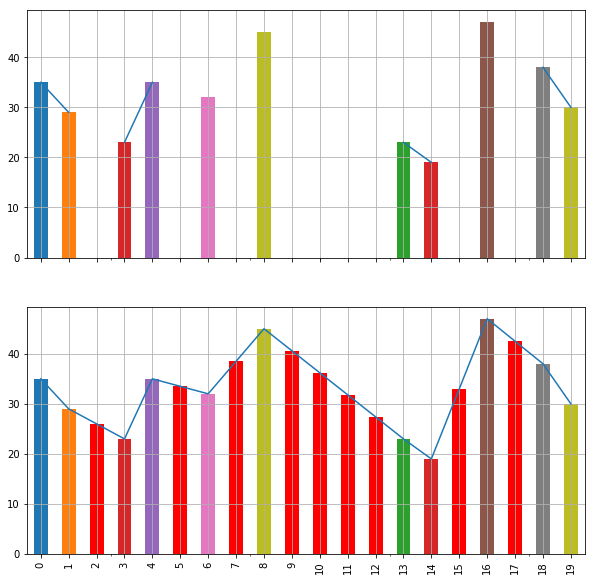

In [17]:
fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True, sharey=True, figsize=(10,10))
df['ept'].plot(ax=axes[0])
df['ept'].plot(ax=axes[0], grid=True, kind="bar")

dfi = df['ept'].interpolate()
dfi.plot(ax=axes[1])
dfi.plot(ax=axes[1], grid=True, kind="bar", color="red")
df['ept'].plot(ax=axes[1], grid=True, kind="bar")

print (df['ept'].interpolate())

La aproximación lineal, aunque es la más simple, es la menos natural. Es posible utilizar cualquier otro conjunto de curvas, típicamente de la forma, que se ajusten a los datos conocidos. A continuación, se presentan ajustes a curvas cuadráticas y cúbicas:

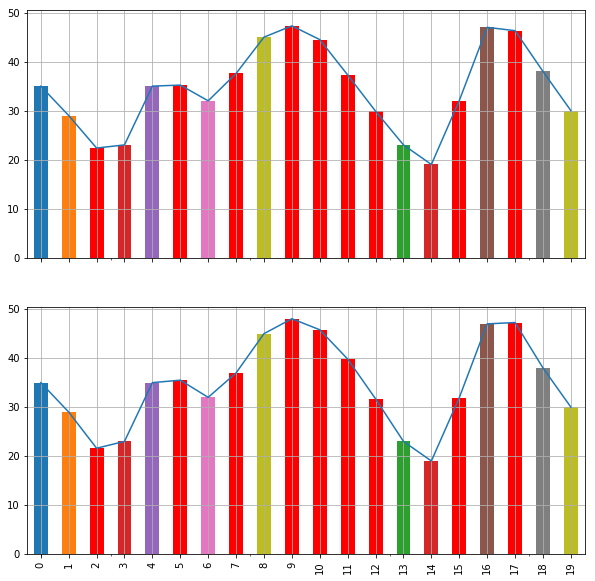

In [18]:
fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True, sharey=True, figsize=(10,10))
dfi = df['ept'].interpolate(method="quadratic")
dfi.plot(ax=axes[0])
dfi.plot(ax=axes[0], grid=True, kind="bar", color="red")
df['ept'].plot(ax=axes[0], grid=True, kind="bar")

dfi = df['ept'].interpolate(method="cubic")
dfi.plot(ax=axes[1])
dfi.plot(ax=axes[1], grid=True, kind="bar", color="red")
df['ept'].plot(ax=axes[1], grid=True, kind="bar")

Cualquier otra técnica de predicción puede ser empleada para rellenar los valores faltantes. Una de las más importantes es el razonamiento basado en casos ([RBC](https://en.wikipedia.org/wiki/Case-based_reasoning)). 

## Valores atípicos

Un valor atípico es una observación que se ubica fuera del patrón general de distribución de los datos ([Mathworld](http://mathworld.wolfram.com/Outlier.html)). 

![](images/Outlier.png)
![ ](images/blank.png)

Los valores atípicos pueden deberse a diferentes causas, siendo las principales:
* Casos que no se ajustan al modelo de estudio
* Errores en la medición

El tratamiento dado a los valores atípicos depende del origen de la inconsistencia. En el caso de errores en la medición pueden eliminarse o ajustarse (como en el caso de [valores faltantes](http://nbviewer.ipython.org/github/rsotoc/pattern-recognition/blob/master/Limpieza%20de%20datos%20I.ipynb)). Cuando la causa es que los casos no se ajustan al modelo utilizado pueden indicar la necesidad de replantear el modelo (incluyendo modificaciones a la teoría, como sucedía con el caso del movimiento anómalo de Mercurio). Sin embargo, también pueden representar casos singulares o excepcionales. En cualquier caso, es importante detectar estos valores, pues su presencia generan tendencias en el análisis global de los datos.

Una forma común de analizar la presencia de valores atípicos es a través de los diagramas de caja (boxplots). El diagrama de caja es una descripción gráfica de la agrupación de los datos en base a sus cuartiles y tiene la siguiente estructura:

[![ ](images/457px-Boxplot.svg.png)](https://es.wikipedia.org/wiki/Diagrama_de_caja)
![ ](images/blank.png)

El espaciado entre los componentes de una caja reflejan la dispersión y tendencias en los datos. La parte principal de esta representación es la propia caja. La tapa inferior corresponde al primer cuartil (Q1, el punto que separa el 25% de los datos inferiores), la línea intermedia refleja la mediana o segundo cuartil (Q2) y la tapa superior corresponde al tercer cuartil (Q3, el punto que delimita el 75% de los datos inferiores). RIC es el *rango inter cuartil* y es el 50% de los datos que quedan al centro del conjunto total de datos. Las líneas punteadas se denomina *bigotes* (*whiskers*); los extremos de los bigotes inferior y superior suelen seleccionarse como el menor dato que aún queda a una distancia máxima de 1.5 veces RIC por abajo de Q1 y el dato máximo a una distancia igual o menor de 1.5 RIC por arriba de Q3. 

Analizamos la submuestra de datos de diabetes, en primera instancia para la variable '*gl2h*' y posteriormente para todo el conjunto, utilizando los datos con valores faltantes en cero.

    emb  gl2h  pad  ept  is2h   imc    fpd  edad  class
0     6   148   72   35     0  33.6  0.627    50      1
1     1    85   66   29     0  26.6  0.351    31      0
2     8   183   64    0     0  23.3  0.672    32      1
3     1    89   66   23    94  28.1  0.167    21      0
4     0   137   40   35   168  43.1  2.288    33      1
5     5   116   74    0     0  25.6  0.201    30      0
6     3    78   50   32    88  31.0  0.248    26      1
7    10   115    0    0     0  35.3  0.134    29      0
8     2   197   70   45   543  30.5  0.158    53      1
9     8   125   96    0     0   0.0  0.232    54      1
10    4   110   92    0     0  37.6  0.191    30      0
11   10   168   74    0     0  38.0  0.537    34      1
12   10   139   80    0     0  27.1  1.441    57      0
13    1   189   60   23   846  30.1  0.398    59      1
14    5   166   72   19   175  25.8  0.587    51      1
15    7   100    0    0     0  30.0  0.484    32      1
16    0   118   84   47   230  45.8  0.551    31

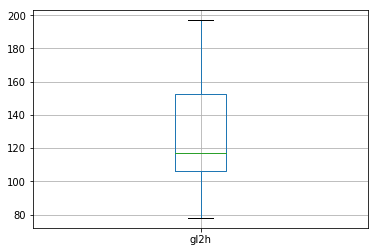

In [19]:
df2 = pd.read_csv(path + "pima-indians-diabetes.data-small-orig", 
                 names = ['emb', 'gl2h', 'pad', 'ept', 'is2h', 'imc', 'fpd', 'edad', 'class'])

print(df2)
print(df2.describe())
df2.boxplot(column='gl2h')
plt.show()

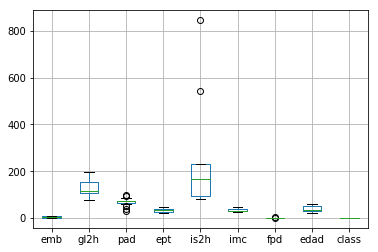

In [20]:
df.boxplot()
plt.show()

Obsérvese que los datos en cero ejercen un efecto importante en el análisis. En el caso de la columna *is2h*, por ejemplo, con 11 valores faltantes puestos a cero, pareciera que ese es un valor *típico*. En estos casos es importante realizar previamente el análisis para detectar valores faltantes expresados como 0. A continuación, realizamos el análisis con los datos después de hacer una imputación con la media.

            emb        gl2h        pad        ept        is2h        imc  \
count  20.00000   20.000000  20.000000  20.000000   20.000000  20.000000   
mean    4.50000  129.400000  68.555556  32.363636  258.111111  32.578947   
std     3.56149   35.354446  15.462083   6.450400  170.973511   6.335496   
min     0.00000   78.000000  30.000000  19.000000   83.000000  23.300000   
25%     1.00000  106.000000  65.500000  31.500000  173.250000  27.850000   
50%     4.50000  117.000000  70.000000  32.363636  258.111111  30.750000   
75%     7.25000  152.500000  74.000000  33.022727  258.111111  35.875000   
max    10.00000  197.000000  96.000000  47.000000  846.000000  45.800000   

             fpd       edad     class  
count  20.000000  20.000000  20.00000  
mean    0.511650  37.450000   0.65000  
std     0.513691  11.591626   0.48936  
min     0.134000  21.000000   0.00000  
25%     0.198500  30.750000   0.00000  
50%     0.374500  32.000000   1.00000  
75%     0.560000  50.250000   1.000

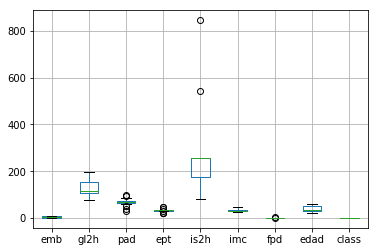

In [21]:
df2 = df.fillna(df.mean())
print(df2.describe(), '\n')
print(df2)

df2.boxplot()
plt.show()

Obsérvese que la columna *is2h* (Cantidad de insulina en suero en dos horas) sigue teniendo un comportamiento problemático. Aparentemente, hasta donde podemos *adivinar* de los datos, 543 y 846 son valores atípicos. Sin embargo, con 11 valores faltantes (55%) es poco lo que se puede decir con certeza del comportamiento de estos datos.

## Valores inconsistentes

Una inconsistencia se define como la "falta de estabilidad y coherencia en una cosa". Un elemento inconsistente en un sistema es algo que no pertenece al sistema. Un valor inconsistente es un valor "extraño" al conjunto de datos (no atípico).

Una inconsistencia obvia es un valor o combinación de valores que no puede ocurrir en un contexto real: edad negativa, promedio de egreso de preparatoria menor a 60/100 (en México), (sexo=masculino, estado=embarazo), etc.

La detección de valores inconsistentes en un conjunto de datos es particularmente difícil. El conocimiento en el que se basa este proceso debe codificarse en forma de restricciones o reglas de edición. Una forma común de optimizar este proceso es a través de expresiones regulares.

<hr style="border-width: 3px;">

## Conclusiones

* El problema de valores faltantes es una fuente común de imperfecciones en los datos. 
* En muchos casos, el problema de valores faltantes queda enmascarado por valores por omisión.
* Existen diversas formas de tratar con el problema de valores faltantes, especialmente cuando no representan un alto porcentaje de los datos disponibles.
* Los problemas de valores atípicos y, sobre todo, de valores inconsistentes suelen ser más difíciles de tratar.


###### <a name="tarea_6">Tarea 6</a>

* Analice los problemas de valores faltantes en el conjunto de datos *Pima Indians Diabetes* completo. 
* Realice la imputación de los datos utilizando 3 aproximaciones diferentes y compare los resultados.

**Fecha de entrega**: 14 septiembre.